In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **RNN (Recurrent Neural Network)**

In [2]:
from keras import layers
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
import numpy.random as nr

import tensorflow
import numpy as np

from keras.utils import pad_sequences

%matplotlib inline

In [3]:
max_features = 10000
max_len = 250

old = np.load

In [4]:
np.load = lambda *a,**k: old(*a,**k)

In [5]:
(train_text, train_labels), (test_text, test_labels) = imdb.load_data(num_words = max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
np.load = old
del(old)

In [7]:
train_text = pad_sequences(train_text, maxlen = max_len)
test_text = pad_sequences(test_text, maxlen = max_len)
print(len(train_text))
print(train_text[1])

25000
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1  194 1153  194 8255   78  228    5    6
 1463 4369 5012  134   26    4  715    8  118 1634   14  394   20   13
  119  954  189  102    5  207  110 3103   21   14   69  188    8   30
   23    7    4  249  126   93    4  114    9 2300 1523    5  647    4
  116    9   35 8163    4  229    9  340 1322    4  118    9    4  130
 4901   19    4 1002    5   89   29  952   46   37    4  455    9   45
   43   38 1543 1905  398    4 1649   26 6853    5  163   11 3215    2
    4 1153    9  194  775    7 8255    2  349 2637  148  605    2 8003
   15  123  125   68    2 6853   15  349  165 4362   98    5    4  228
    9   43    2 1157   15  299  120    5  120  174   11  220  175  136


In [8]:
embedding = Sequential()
## First add an embedding layer
embedding.add(Embedding(10000, 8, input_length = max_len, embeddings_regularizer = regularizers.l2(0.01)))
## Flatten the embedding of the features
embedding.add(Flatten())
## Now the  binary classifier layer
embedding.add(Dense(1, activation = 'sigmoid'))
embedding.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
embedding.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 82,001
Trainable params: 82,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
nr.seed(3421)
tensorflow.random.set_seed(654)
historyEMB = embedding.fit(train_text, train_labels,
                   epochs = 20,
                   batch_size = 256,
                   validation_data = (test_text, test_labels))

Epoch 1/20
98/98 [==============================] - 2s 13ms/step - loss: 0.7549 - acc: 0.5671 - val_loss: 0.6769 - val_acc: 0.6529
Epoch 2/20
98/98 [==============================] - 1s 11ms/step - loss: 0.6427 - acc: 0.7105 - val_loss: 0.6106 - val_acc: 0.7437
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 0.5809 - acc: 0.7787 - val_loss: 0.5593 - val_acc: 0.7861
Epoch 4/20
98/98 [==============================] - 1s 10ms/step - loss: 0.5407 - acc: 0.8022 - val_loss: 0.5270 - val_acc: 0.8076
Epoch 5/20
98/98 [==============================] - 1s 11ms/step - loss: 0.5130 - acc: 0.8188 - val_loss: 0.5042 - val_acc: 0.8220
Epoch 6/20
98/98 [==============================] - 1s 11ms/step - loss: 0.4925 - acc: 0.8284 - val_loss: 0.4854 - val_acc: 0.8318
Epoch 7/20
98/98 [==============================] - 1s 11ms/step - loss: 0.4742 - acc: 0.8374 - val_loss: 0.4716 - val_acc: 0.8381
Epoch 8/20
98/98 [==============================] - 1s 11ms/step - loss: 0.4599 - a

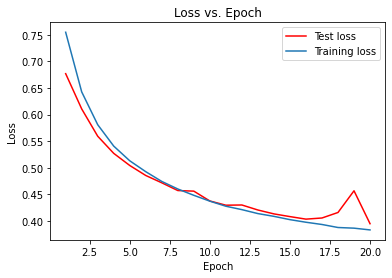

In [10]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(historyEMB)

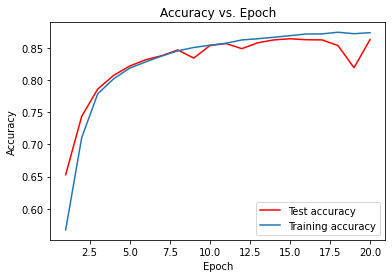

In [11]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch') 
    
plot_accuracy(historyEMB)

In [12]:
RNN1 = Sequential()
## First add an embedding layer
RNN1.add(Embedding(max_features, 32, embeddings_regularizer = regularizers.l2(0.01)))
## Now add an RNN layer
RNN1.add(SimpleRNN(32, kernel_regularizer = regularizers.l2(0.01)))
## And the classifier layer
RNN1.add(Dense(1, activation = 'sigmoid'))
RNN1.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
RNN1.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [13]:
nr.seed(6754)
tensorflow.random.set_seed(7766)
historyRNN = RNN1.fit(train_text, train_labels,
                   epochs = 20,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Epoch 1/20
25/25 [==============================] - 10s 362ms/step - loss: 1.9135 - acc: 0.5697 - val_loss: 1.1444 - val_acc: 0.5624
Epoch 2/20
25/25 [==============================] - 11s 449ms/step - loss: 0.9513 - acc: 0.6512 - val_loss: 0.8078 - val_acc: 0.7318
Epoch 3/20
25/25 [==============================] - 15s 607ms/step - loss: 0.7885 - acc: 0.7147 - val_loss: 0.7040 - val_acc: 0.7711
Epoch 4/20
25/25 [==============================] - 9s 350ms/step - loss: 0.7155 - acc: 0.7484 - val_loss: 0.7638 - val_acc: 0.6973
Epoch 5/20
25/25 [==============================] - 8s 340ms/step - loss: 0.6876 - acc: 0.7528 - val_loss: 0.5913 - val_acc: 0.8163
Epoch 6/20
25/25 [==============================] - 8s 341ms/step - loss: 0.6372 - acc: 0.7700 - val_loss: 0.6004 - val_acc: 0.8054
Epoch 7/20
25/25 [==============================] - 8s 341ms/step - loss: 0.6197 - acc: 0.7798 - val_loss: 0.6706 - val_acc: 0.7354
Epoch 8/20
25/25 [==============================] - 8s 342ms/step - loss:

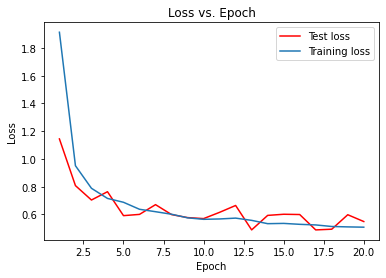

In [14]:
plot_loss(historyRNN)

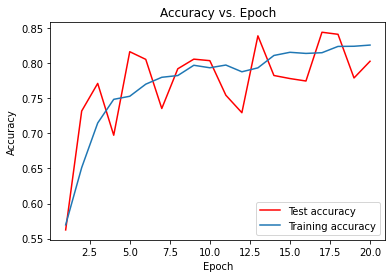

In [15]:
plot_accuracy(historyRNN)

# **LSTM (Long Short Term Memory)**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
apple_training_complete = pd.read_csv('/content/drive/MyDrive/Work/ML/Algorithms/Long Short Term Memory/yahoofinance.csv')

In [18]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [20]:
features_set = []
labels = []
for i in range(60, 250):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [21]:
features_set, labels = np.array(features_set), np.array(labels)

In [22]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [23]:
model = Sequential()

In [24]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [25]:
model.add(Dropout(0.2))

In [26]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [27]:
model.add(Dense(units = 1))

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
6/6 [==============================] - 10s 209ms/step - loss: 0.1708
Epoch 2/100
6/6 [==============================] - 1s 119ms/step - loss: 0.0465
Epoch 3/100
6/6 [==============================] - 1s 125ms/step - loss: 0.0294
Epoch 4/100
6/6 [==============================] - 1s 124ms/step - loss: 0.0238
Epoch 5/100
6/6 [==============================] - 1s 118ms/step - loss: 0.0185
Epoch 6/100
6/6 [==============================] - 1s 119ms/step - loss: 0.0165
Epoch 7/100
6/6 [==============================] - 1s 122ms/step - loss: 0.0145
Epoch 8/100
6/6 [==============================] - 1s 125ms/step - loss: 0.0143
Epoch 9/100
6/6 [==============================] - 1s 120ms/step - loss: 0.0150
Epoch 10/100
6/6 [==============================] - 1s 122ms/step - loss: 0.0131
Epoch 11/100
6/6 [==============================] - 1s 121ms/step - loss: 0.0147
Epoch 12/100
6/6 [==============================] - 1s 124ms/step - loss: 0.0146
Epoch 13/100
6/6 [==================

In [30]:
apple_testing_processed = apple_training_complete.iloc[:, 1:2].values

In [31]:
apple_total = pd.concat((apple_training_complete['Open'], apple_training_complete['Open']), axis=0)

In [32]:
test_inputs = apple_total[len(apple_total) - len(apple_training_complete) - 60:].values

In [33]:
test_inputs

array([291.119995, 289.459991, 289.929993, 296.23999 , 297.149994,
       293.790009, 299.839996, 297.160004, 307.23999 , 310.600006,
       311.640015, 316.700012, 311.850006, 313.589996, 316.269989,
       317.190002, 318.579987, 317.920013, 320.25    , 310.059998,
       312.600006, 324.450012, 320.540009, 320.929993, 304.299988,
       315.309998, 323.519989, 322.570007, 322.369995, 314.179993,
       323.600006, 321.470001, 324.190002, 324.73999 , 315.359985,
       320.      , 322.630005, 318.619995, 297.26001 , 300.950012,
       286.529999, 281.100006, 257.26001 , 282.279999, 303.670013,
       296.440002, 295.519989, 282.      , 263.75    , 277.140015,
       277.390015, 255.940002, 264.890015, 241.949997, 247.509995,
       239.770004, 247.389999, 247.179993, 228.080002, 236.360001,
       191.509995, 191.660004, 188.75    , 188.949997, 189.830002,
       191.639999, 191.089996, 193.25    , 194.789993, 196.449997,
       196.419998, 200.320007, 198.679993, 200.850006, 199.199

In [34]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(60,250):
    test_features.append(test_inputs[i-60:i, 0])

In [35]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [36]:
predictions = model.predict(test_features)

6/6 [==============================] - 2s 39ms/step


In [37]:
predictions = scaler.inverse_transform(predictions)

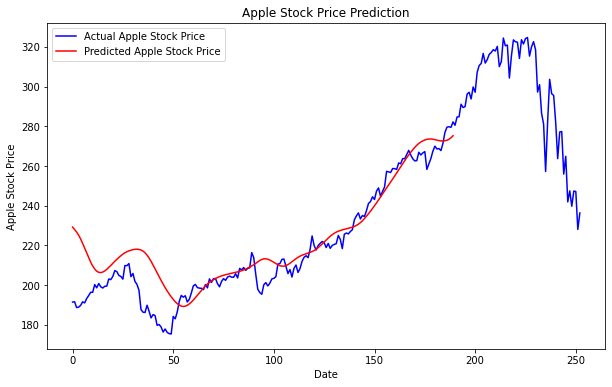

In [38]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# **LSTM Text**

In [39]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from urllib.request import urlopen

In [40]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
file = urlopen(url)
document=(file.read())

In [41]:
document

b'\xef\xbb\xbfThe Project Gutenberg eBook of Alice\xe2\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice\xe2\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE\xe2\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r

In [42]:
document=document.lower()

In [43]:
# create mapping of unique chars to integers
chars = sorted(list(set(document)))             #set of all distinct characters
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [44]:
list(set(document))

[128,
 10,
 13,
 148,
 152,
 153,
 156,
 157,
 32,
 33,
 34,
 35,
 36,
 109,
 37,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 187,
 59,
 185,
 191,
 63,
 195,
 91,
 120,
 93,
 95,
 97,
 98,
 99,
 226,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 100,
 110,
 239,
 112,
 111,
 114,
 115,
 116,
 117,
 118,
 119,
 113,
 121,
 122]

In [45]:
n_chars = len(document)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  174313
Total Vocab:  70


In [46]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = document[i:i + seq_length]
	seq_out = document[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  174213


In [47]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [48]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [49]:
model.fit(X, y, epochs=10, batch_size=128)

Epoch 1/10
1362/1362 [==============================] - 902s 661ms/step - loss: 3.0303
Epoch 2/10
1362/1362 [==============================] - 895s 657ms/step - loss: 2.6898
Epoch 3/10
1362/1362 [==============================] - 897s 659ms/step - loss: 2.5787
Epoch 4/10
1362/1362 [==============================] - 912s 669ms/step - loss: 2.4970
Epoch 5/10
1362/1362 [==============================] - 905s 664ms/step - loss: 2.4281
Epoch 6/10
1362/1362 [==============================] - 907s 666ms/step - loss: 2.3817
Epoch 7/10
1362/1362 [==============================] - 910s 668ms/step - loss: 2.3315
Epoch 8/10
1362/1362 [==============================] - 911s 669ms/step - loss: 2.2903
Epoch 9/10
1362/1362 [==============================] - 901s 661ms/step - loss: 2.2510
Epoch 10/10
1362/1362 [==============================] - 912s 670ms/step - loss: 2.2166


# New **Task**

In [50]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [51]:
filename = "NG Machine Learning/alice.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

FileNotFoundError: ignored

In [ ]:
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

In [ ]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X, y, epochs=10, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-10-2.1507.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
generate=""
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
  x = numpy.reshape(pattern, (1, len(pattern), 1))
  x = x / float(n_vocab)
  prediction = model.predict(x, verbose=0)
  index = numpy.argmax(prediction)
  result = int_to_char[index]
  print(result)
  generate+=result
  seq_in = [int_to_char[value] for value in pattern]
  pattern.append(index)
  pattern = pattern[1:len(pattern)]

print(generate, end="")
print ("\nDone.")

In [ ]:
generate